# Batch Size

In [1]:
from content_opener import open_all_contents, open_contents, Results, Settings, Values, Labels
from typing import List
import matplotlib.pyplot as plt
import numpy as np

## Test batch sizes

datasets:
'CIFAR10',
'CIFAR100'

nets:
'ResNet18'

optimizers:
'SGD',
'Adam',
'AdaSecant'

cycles:
'constantLR',
'100-cycle',
'50-cycle',
'25-cycle'

decays:
'exponentialDecay=False',
'exponentialDecay=True',
'exponentialDecay=maxLR',
'exponentialDecay=slope'


learning rates:
'lr=0.001',
'lr=0.01',
'lr=0.1',
'lr=1',
'lr=3',
'lr=0.01-1',
'lr=0.01-3',
'lr=0.001-1',
'lr=0.001-3'

batch-sizes:
'batch-size=32',
'batch-size=128',
'batch-size=512',
'batch-size=2048'

In [9]:
def compare_batch_sizes(dataset: str, net: str, optimizer: str, cycle: str, decay: str, lr: str):
    settings_list = []
    settings_list.append(Settings(dataset, net, optimizer, cycle, decay, lr, 'batch_size=32'))
    settings_list.append(Settings(dataset, net, optimizer, cycle, decay, lr, 'batch_size=128'))
    settings_list.append(Settings(dataset, net, optimizer, cycle, decay, lr, 'batch_size=512'))
    results = open_all_contents(settings_list)
    for i in range(len(results)):
        plt.plot(results[i].values.val_accuracy, label='batch size ' + results[i].get_labels().batch_size)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    labels = results[0].get_labels()
    lr = labels.initial_lr
    if results[0].settings.cycle != 'constantLR':
        lr = lr + '-' + labels.max_lr
    plt.title(labels.dataset + ', '
              + labels.net + ', '
              + labels.optimizer + ', '
              + labels.decay + ', '
              + labels.cycle + ', '
              + 'lr = ' + lr)

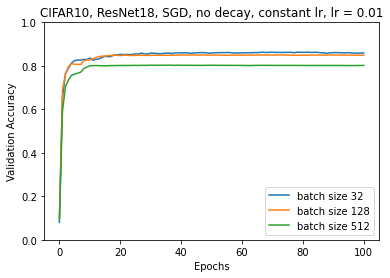

In [10]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.01'
compare_batch_sizes(dataset, net, optimizer, cycle, decay, lr)

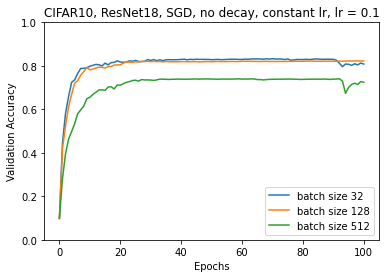

In [11]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = 'constantLR'
decay = 'exponentialDecay=False'
lr = 'lr=0.1'
compare_batch_sizes(dataset, net, optimizer, cycle, decay, lr)

In [12]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = '100-cycle'
decay = 'exponentialDecay=False'
lr = 'lr=0.01-1'
compare_batch_sizes(dataset, net, optimizer, cycle, decay, lr)

FileNotFoundError: [Errno 2] No such file or directory: 'CIFAR10/ResNet18/SGD/100-cycle/exponentialDecay=False/lr=0.01-1/batch_size=32/train_loss'

In [13]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = '25-cycle'
decay = 'exponentialDecay=False'
lr = 'lr=0.01-1'
compare_batch_sizes(dataset, net, optimizer, cycle, decay, lr)

FileNotFoundError: [Errno 2] No such file or directory: 'CIFAR10/ResNet18/SGD/25-cycle/exponentialDecay=False/lr=0.01-1/batch_size=32/train_loss'

In [14]:
dataset = 'CIFAR10'
net = 'ResNet18'
optimizer = 'SGD'
cycle = '10-cycle'
decay = 'exponentialDecay=False'
lr = 'lr=0.01-1'
compare_batch_sizes(dataset, net, optimizer, cycle, decay, lr)

FileNotFoundError: [Errno 2] No such file or directory: 'CIFAR10/ResNet18/SGD/10-cycle/exponentialDecay=False/lr=0.01-1/batch_size=32/train_loss'

## Conclusion for SGD

We evaluate the quality of our results based on validation accuracy. For small constant learning rates (0.01) a clear hierarchy, with small batch sizes at the top and larger batch sizes at the bottom, can be observed. For larger learning rates (0.1) there is almost no difference in the quality of results. Only the very large batch size leads to a worse result. This holds true for cyclical learning rates as well. For the high-frequent "10-cycle" batch size 32, which is the smallest tested batch size, performs actually worse than all others except for 2048, the largest batch size.


An optimal choice of batch-sizes for our experiments will therefore be made as follows:

- For constant learning rates of 0.01 and smaller, in combination with SGD, we choose a batch size of 32.
- For all other learning rates we chosse a batch size of 128.

Thus, we give each learning rate scheme an optimal bases for performance.

## Alternatively: Conclusion for SGD

We evaluate the quality of our results based on validation accuracy. For small constant learning rates (0.01) a clear hierarchy, with small batch sizes at the top and larger batch sizes at the bottom, can be observed. For larger learning rates (0.1) there is almost no difference in the quality of results. Only the very large batch size leads to a worse result. This holds true for cyclical learning rates as well. For the high-frequent "10-cycle" batch size 32, which is the smallest tested batch size, performs actually worse than all others except for 2048, the largest batch size.


As batch size 128 works quite well for all experiments, we choose it as our default batch size for the upcoming experiments. Thereby, we ensure comparability across all experiments.